# 전처리

## 데이터 불러오기

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random_state = 42

%matplotlib inline

In [35]:
train_df = pd.read_csv('data.csv')
train_df.head()

,Target,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,0,0.439526,0.493186,0.490497,0.594077,0.594077,0.998801,0.797274,0.809209,0.303674,...,0.779687,0.001329,0.623635,0.594075,0.838672,0.280196,0.026738,0.564893,1,0.027785
1,0,0.533905,0.585369,0.576369,0.599000,0.599000,0.999018,NaN,0.809378,0.303579,...,0.824762,0.002988,0.624578,0.598999,0.842348,0.279608,0.026795,0.565179,1,0.029882
2,0,NaN,0.568633,0.556561,0.613500,0.613500,0.999130,0.797546,0.809432,0.303461,...,0.811713,0.004189,0.624640,0.613502,0.841584,0.282178,0.027058,0.566173,1,0.023145
3,0,0.594257,0.583570,0.632100,0.607208,0.607208,0.999007,NaN,0.809579,0.303966,...,0.819810,0.002258,0.624431,0.607204,0.843514,0.289039,0.026862,0.565475,1,0.016974
4,0,0.410276,0.467455,0.457412,0.605630,0.605630,0.998929,NaN,0.809040,0.303097,...,0.752335,0.014536,0.623780,0.605627,0.833008,0.291304,0.026671,0.564511,1,0.016055


In [37]:
anomal = []
for idx, i in enumerate((train_df.max() > 10).to_list()):
    if i:
        anomal.append(train_df.columns[idx])

In [38]:
cols_to_change = anomal

for col in cols_to_change:
    train_df[col] = train_df[col].apply(lambda x: 0 if x < 2 else 1)

## 파생변수 분포 확인

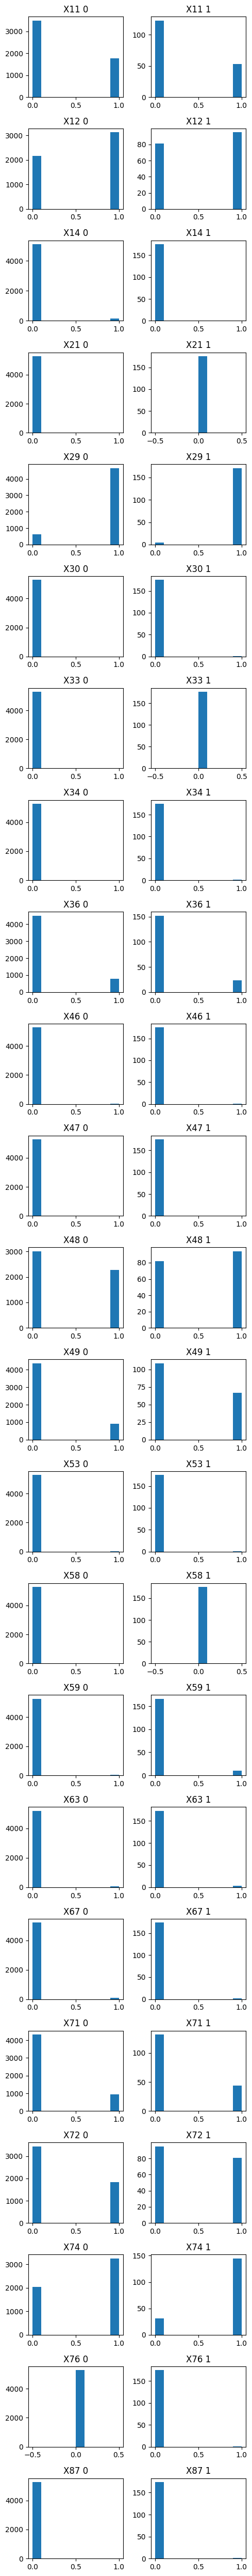

In [39]:
plt.figure(figsize=(5, 50))

subplots = []
for idx in range(1, 2*len(anomal)+1):
    subplots.append(plt.subplot(len(anomal),2,idx))
    
for idx, col in enumerate(anomal):
    subplots[2*idx].hist(train_df.loc[train_df['Target'] == 0, col])
    subplots[2*idx+1].hist(train_df.loc[train_df['Target'] == 1, col])
    subplots[2*idx].set_title(col + ' 0')
    subplots[2*idx+1].set_title(col + ' 1')
    
plt.tight_layout()